In [257]:
# import libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

pd.set_option("display.max_columns", 999)
pd.get_option("display.max_columns")

pd.set_option("display.max_rows", 999)
pd.get_option("display.max_rows")

999

In [258]:
# reading txn data
churn_data = pd.read_csv('churn_dataset.csv')

In [259]:
churn_data.head()

,AgentRefID,total_payment,total_successfull_payments,total_failed_payments,total_amount_transaction,max_amount_transaction,min_amount_transaction,avg_amount_transaction,median_amount_transaction,total_amount_transaction_gt100,total_count_transaction_gt100,total_amount_transaction_gt1000,total_count_transaction_gt1000,total_amount_transcation_debit,total_amount_transaction_credit,total_unique_payee,total_unique_distributer,avg_count_payment_permonth,avg_count_payment_gt100_permonth,avg_amount_payment_permonth,avg_amout_payment_gt100_permonth,avg_last_month_amount_txn,avg_txn_first_week,avg_last_month_1week_amount_txn,last_month_amount_gt100,vintage,recency,total_ticket_raised,total_ticket_raised_last_2_month,avg_ticked_rasied_per_month,Churn
0,1,22,21,1,246.0,100.0,1.0,11.714286,2.0,0.0,0,0.0,0,238.0,8.0,8,1,4.0,2.000000,8.988889,100.000000,0.0,1.333333,0.0,0.0,156.0,33.0,0.0,0.0,0.000000,0.0
1,55,132,128,4,1074317.0,25000.0,1.0,8393.101562,4999.0,1074274.0,85,1069574.0,79,1074274.0,43.0,52,1,56.0,28.333333,7712.888651,11878.973459,0.0,5923.153846,0.0,0.0,56.0,138.0,0.0,0.0,0.000000,1.0
2,83,3361,3253,108,7335134.0,25000.0,1.0,2254.882877,1950.0,7333954.0,2320,6879216.0,1797,7334204.0,930.0,1573,1,133.5,387.000000,1848.848726,2784.038428,16004.0,2140.512927,0.0,16000.0,203.0,1.0,1.0,0.0,1.000000,0.0
3,180,1965,1878,87,5929296.0,25000.0,1.0,3157.239617,2000.0,5929067.0,1847,5508229.0,1372,5929274.0,22.0,883,1,297.0,264.142857,2917.410086,2946.772422,33000.0,3118.101190,23500.0,33000.0,202.0,2.0,7.0,0.0,2.333333,0.0
4,29,901,843,58,1891118.0,25000.0,1.0,2243.319098,2000.0,1890853.0,677,1799222.0,551,1890954.0,164.0,446,1,133.0,96.857143,2235.055844,2754.329794,178070.0,2148.735000,68861.0,178058.0,203.0,1.0,2.0,0.0,1.000000,0.0


In [260]:
churn_data.shape

(4560, 31)

In [261]:
churn_data.describe([0.25, 0.45, 0.75, 0.95])

,AgentRefID,total_payment,total_successfull_payments,total_failed_payments,total_amount_transaction,max_amount_transaction,min_amount_transaction,avg_amount_transaction,median_amount_transaction,total_amount_transaction_gt100,total_count_transaction_gt100,total_amount_transaction_gt1000,total_count_transaction_gt1000,total_amount_transcation_debit,total_amount_transaction_credit,total_unique_payee,total_unique_distributer,avg_count_payment_permonth,avg_count_payment_gt100_permonth,avg_amount_payment_permonth,avg_amout_payment_gt100_permonth,avg_last_month_amount_txn,avg_txn_first_week,avg_last_month_1week_amount_txn,last_month_amount_gt100,vintage,recency,total_ticket_raised,total_ticket_raised_last_2_month,avg_ticked_rasied_per_month,Churn
count,4560.000000,4560.000000,4560.000000,4560.000000,4.560000e+03,4560.000000,4560.000000,4560.000000,4560.000000,4.560000e+03,4560.000000,4.560000e+03,4560.000000,4.560000e+03,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4.560000e+03,4560.000000,4.560000e+03,4.560000e+03,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000
mean,2293.803070,654.980702,617.172588,37.808114,1.583312e+06,14645.676866,160.803092,2718.750598,1854.366797,1.582927e+06,465.067763,1.506309e+06,371.413377,1.583167e+06,144.964254,247.680921,1.053728,98.079605,74.761291,2696.246576,3555.219439,1.672908e+05,2285.845556,5.059475e+04,1.672707e+05,133.493202,31.055044,5.578289,0.632456,1.772595,0.364474
std,1327.151391,1710.028155,1629.269250,111.413443,4.312228e+06,12693.547802,936.644006,1947.897870,1848.811932,4.311683e+06,1243.881620,4.122043e+06,1004.449670,4.311879e+06,428.624975,615.860845,0.244185,252.030318,186.646642,1977.186094,2337.196249,5.326054e+05,2125.762588,1.631912e+05,5.325637e+05,67.567976,43.999255,12.009940,2.025068,2.706737,0.481335
min,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1142.750000,16.000000,15.000000,0.000000,3.209875e+04,5000.000000,1.000000,1712.539971,900.000000,3.198800e+04,9.000000,2.996950e+04,6.000000,3.209475e+04,1.000000,5.000000,1.000000,3.500000,3.000000,1667.951096,2456.118583,0.000000e+00,1000.000000,0.000000e+00,0.000000e+00,85.000000,1.000000,0.000000,0.000000,0.000000,0.000000
45%,2063.550000,53.000000,48.000000,3.000000,1.223764e+05,6000.000000,1.000000,2241.772656,1500.000000,1.218913e+05,34.000000,1.141341e+05,24.000000,1.223724e+05,6.000000,17.000000,1.000000,8.000000,7.200000,2207.683036,2981.873896,2.119350e+03,1993.190105,0.000000e+00,2.100000e+03,138.000000,6.000000,1.000000,0.000000,1.000000,0.000000
50%,2295.500000,71.000000,65.000000,4.000000,1.653125e+05,9900.000000,1.000000,2350.738800,1600.000000,1.652755e+05,47.000000,1.547855e+05,33.000000,1.652960e+05,9.000000,24.000000,1.000000,11.000000,9.309524,2318.955884,3091.243719,5.001500e+03,2105.286323,0.000000e+00,5.000000e+03,152.000000,9.000000,1.000000,0.000000,1.000000,0.000000
75%,3439.250000,454.000000,417.250000,30.000000,1.049106e+06,25000.000000,1.000000,3135.088173,2200.000000,1.048731e+06,310.000000,9.752878e+05,239.000000,1.048943e+06,86.000000,182.250000,1.000000,66.500000,54.000000,3122.546225,4000.000000,7.992525e+04,2873.474916,2.335525e+04,7.992500e+04,198.000000,45.000000,6.000000,0.000000,2.500000,1.000000
95%,4364.050000,3424.800000,3256.150000,195.050000,8.112538e+06,45000.000000,500.000000,6181.021516,5000.000000,8.111526e+06,2481.350000,7.647676e+06,1994.900000,8.111922e+06,779.100000,1306.650000,2.000000,512.000000,387.750000,6283.020873,7773.228910,9.059416e+05,5711.575916,2.747800e+05,9.058384e+05,203.000000,130.000000,26.000000,3.000000,6.500000,1.000000
max,4596.000000,30870.000000,28939.000000,4632.000000,9.671762e+07,49999.000000,24900.000000,24900.000000,24999.0

In [262]:
churn_data['Churn'].value_counts()/len(churn_data)

0.0    0.635526
1.0    0.364474
Name: Churn, dtype: float64

In [263]:
def missing(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing(churn_data)

,Total,Percent
Churn,0,0.0
total_amount_transaction_credit,0,0.0
total_payment,0,0.0
total_successfull_payments,0,0.0
total_failed_payments,0,0.0
total_amount_transaction,0,0.0
max_amount_transaction,0,0.0
min_amount_transaction,0,0.0
avg_amount_transaction,0,0.0
median_amount_transaction,0,0.0


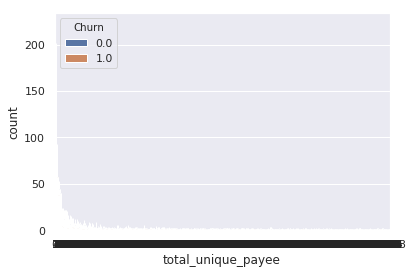

In [264]:
# Visualization
ax = sns.countplot(x="total_unique_payee", data=churn_data, hue= 'Churn')

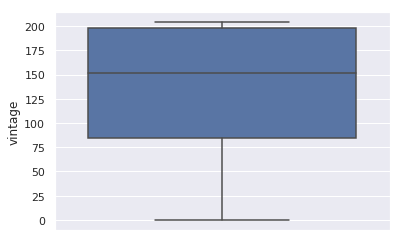

In [265]:
sns.boxplot(y= churn_data["vintage"])

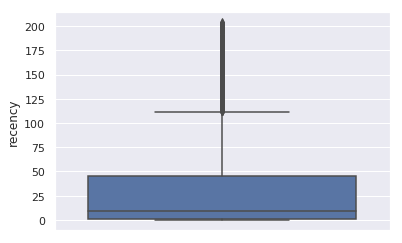

In [266]:
sns.boxplot(y= churn_data["recency"])

In [267]:
#outlier clipping on recency

churn_data['recency'] = churn_data['recency'].clip(churn_data['recency'].min(), 110)

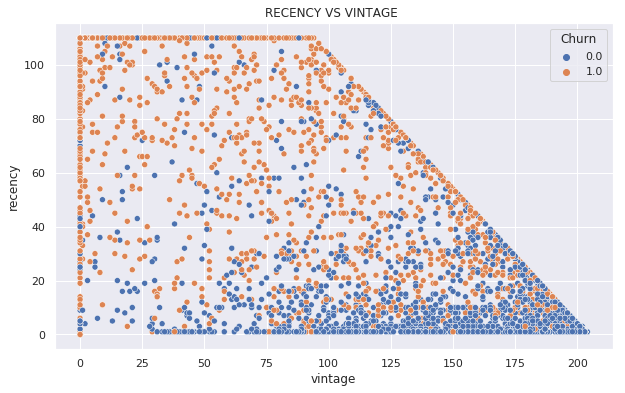

In [268]:
plt.figure(figsize=(10,6))
sns.scatterplot(y= churn_data["recency"], x=churn_data["vintage"], hue=churn_data['Churn'])
plt.title("RECENCY VS VINTAGE ")
plt.show()

In [269]:
# Recency vs vintage shows that those who are using the apps for longer time and they have recent transcation have less propensity of churning.
# Churning is concentrated at low vintage and low recency. it means people who have joined recently are higer chances are churning than older customer


In [270]:
#total_amount_transaction
#max_amount_transaction
#min_amount_transaction
#avg_amount_transaction
#median_amount_transaction

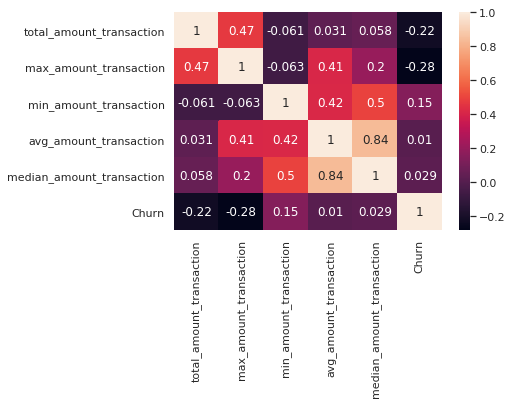

In [271]:
sns.heatmap(churn_data[['total_amount_transaction', 'max_amount_transaction', 'min_amount_transaction', 'avg_amount_transaction','median_amount_transaction', 'Churn']].corr(), annot=True)

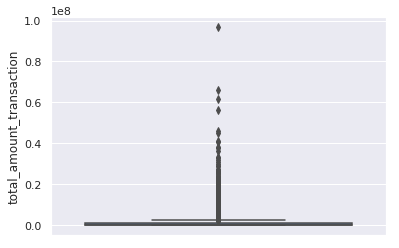

In [272]:
sns.boxplot(y= churn_data["total_amount_transaction"])

In [273]:
# outlier present in total_amount_transaction
# let's clip the value to 

churn_data['total_amount_transaction'] = churn_data['total_amount_transaction'].clip(churn_data['total_amount_transaction'].min(), 1400000)

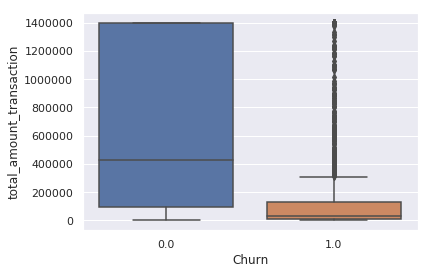

In [274]:
# total_amount_transaction

sns.boxplot(y= churn_data["total_amount_transaction"],x= churn_data["Churn"])

In [275]:
# Customer who has transact less amount tota are more likely to churn.

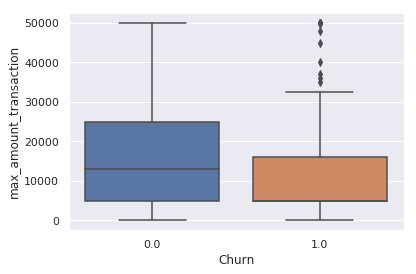

In [276]:
#max_amount_transaction
sns.boxplot(y= churn_data["max_amount_transaction"], x=churn_data["Churn"])

In [277]:
# Customer who has transact maximum amount more than 10K are less like to churn

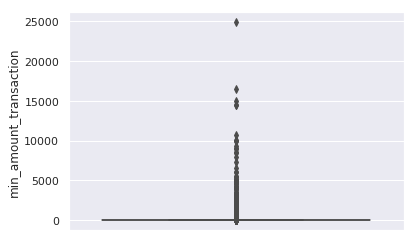

In [278]:
#min_amount_transaction
sns.boxplot(y= churn_data["min_amount_transaction"])

In [279]:
#let's clip the outlier
churn_data['min_amount_transaction'] = churn_data['min_amount_transaction'].clip(churn_data['min_amount_transaction'].min(), 5000)

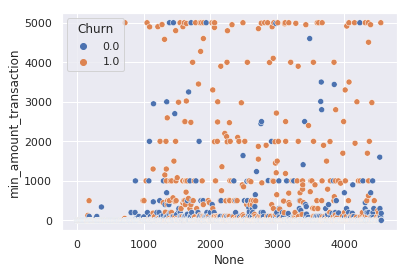

In [280]:
sns.scatterplot(y= churn_data["min_amount_transaction"], x=churn_data.index, hue=churn_data['Churn'])

In [281]:
# Customer who has high minimum transaction are more prone to churn.

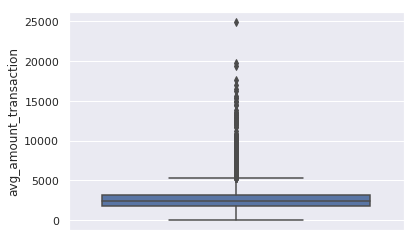

In [282]:
#avg_amount_transaction
sns.boxplot(y= churn_data["avg_amount_transaction"])

In [283]:
#oulier clipping
churn_data['avg_amount_transaction'] = churn_data['avg_amount_transaction'].clip(churn_data['avg_amount_transaction'].min(), 7000)

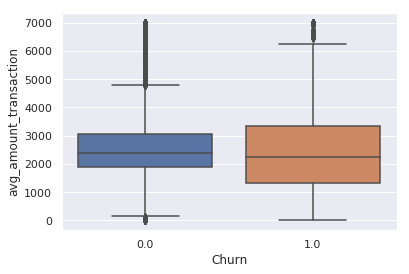

In [284]:
#avg_amount_transaction
sns.boxplot(y= churn_data["avg_amount_transaction"], x=churn_data["Churn"])

In [285]:
# There is no much difference between customer who churn and not churn on their avg amount transaction

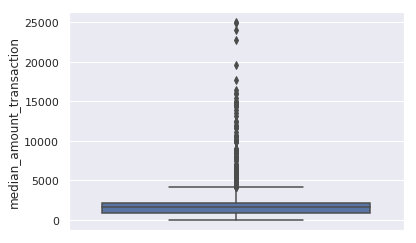

In [286]:
#median_amount_transaction
sns.boxplot(y= churn_data["median_amount_transaction"])

In [287]:
#oulier clipping
churn_data['median_amount_transaction'] = churn_data['median_amount_transaction'].clip(churn_data['median_amount_transaction'].min(), 7000)

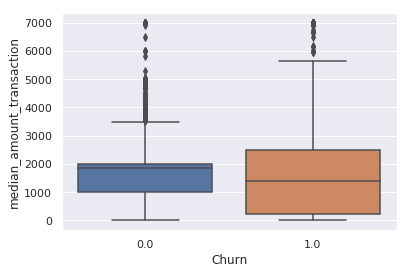

In [288]:
#avg_amount_transaction
sns.boxplot(y= churn_data["median_amount_transaction"], x=churn_data["Churn"])

In [289]:
#customer who churned has large width of of amount payment whereas in case not churning the amount is between 1000, to 2000. 

In [290]:
# RFM  column Creation

In [291]:
churn_data.head()

,AgentRefID,total_payment,total_successfull_payments,total_failed_payments,total_amount_transaction,max_amount_transaction,min_amount_transaction,avg_amount_transaction,median_amount_transaction,total_amount_transaction_gt100,total_count_transaction_gt100,total_amount_transaction_gt1000,total_count_transaction_gt1000,total_amount_transcation_debit,total_amount_transaction_credit,total_unique_payee,total_unique_distributer,avg_count_payment_permonth,avg_count_payment_gt100_permonth,avg_amount_payment_permonth,avg_amout_payment_gt100_permonth,avg_last_month_amount_txn,avg_txn_first_week,avg_last_month_1week_amount_txn,last_month_amount_gt100,vintage,recency,total_ticket_raised,total_ticket_raised_last_2_month,avg_ticked_rasied_per_month,Churn
0,1,22,21,1,246.0,100.0,1.0,11.714286,2.0,0.0,0,0.0,0,238.0,8.0,8,1,4.0,2.000000,8.988889,100.000000,0.0,1.333333,0.0,0.0,156.0,33.0,0.0,0.0,0.000000,0.0
1,55,132,128,4,1074317.0,25000.0,1.0,7000.000000,4999.0,1074274.0,85,1069574.0,79,1074274.0,43.0,52,1,56.0,28.333333,7712.888651,11878.973459,0.0,5923.153846,0.0,0.0,56.0,110.0,0.0,0.0,0.000000,1.0
2,83,3361,3253,108,1400000.0,25000.0,1.0,2254.882877,1950.0,7333954.0,2320,6879216.0,1797,7334204.0,930.0,1573,1,133.5,387.000000,1848.848726,2784.038428,16004.0,2140.512927,0.0,16000.0,203.0,1.0,1.0,0.0,1.000000,0.0
3,180,1965,1878,87,1400000.0,25000.0,1.0,3157.239617,2000.0,5929067.0,1847,5508229.0,1372,5929274.0,22.0,883,1,297.0,264.142857,2917.410086,2946.772422,33000.0,3118.101190,23500.0,33000.0,202.0,2.0,7.0,0.0,2.333333,0.0
4,29,901,843,58,1400000.0,25000.0,1.0,2243.319098,2000.0,1890853.0,677,1799222.0,551,1890954.0,164.0,446,1,133.0,96.857143,2235.055844,2754.329794,178070.0,2148.735000,68861.0,178058.0,203.0,1.0,2.0,0.0,1.000000,0.0


In [292]:
quartiles = churn_data[["total_amount_transaction", "total_successfull_payments", "recency"]].quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

      total_amount_transaction  total_successfull_payments  recency
0.25                  32098.75                       15.00      1.0
0.50                 165312.50                       65.00      9.0
0.75                1049106.25                      417.25     45.0 <class 'pandas.core.frame.DataFrame'>


In [293]:
## for Recency 

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Frequency and Monetary value 

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1    

In [294]:
churn_data['R_Quartile'] = churn_data['recency'].apply(RClass, args=('recency',quartiles,))
churn_data['F_Quartile'] = churn_data['total_successfull_payments'].apply(FMClass, args=('total_successfull_payments',quartiles,))
churn_data['M_Quartile'] = churn_data['total_amount_transaction'].apply(FMClass, args=('total_amount_transaction',quartiles,))

In [295]:
churn_data['Total_Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']

In [296]:
churn_data.head()

,AgentRefID,total_payment,total_successfull_payments,total_failed_payments,total_amount_transaction,max_amount_transaction,min_amount_transaction,avg_amount_transaction,median_amount_transaction,total_amount_transaction_gt100,total_count_transaction_gt100,total_amount_transaction_gt1000,total_count_transaction_gt1000,total_amount_transcation_debit,total_amount_transaction_credit,total_unique_payee,total_unique_distributer,avg_count_payment_permonth,avg_count_payment_gt100_permonth,avg_amount_payment_permonth,avg_amout_payment_gt100_permonth,avg_last_month_amount_txn,avg_txn_first_week,avg_last_month_1week_amount_txn,last_month_amount_gt100,vintage,recency,total_ticket_raised,total_ticket_raised_last_2_month,avg_ticked_rasied_per_month,Churn,R_Quartile,F_Quartile,M_Quartile,Total_Score
0,1,22,21,1,246.0,100.0,1.0,11.714286,2.0,0.0,0,0.0,0,238.0,8.0,8,1,4.0,2.000000,8.988889,100.000000,0.0,1.333333,0.0,0.0,156.0,33.0,0.0,0.0,0.000000,0.0,3,3,4,10
1,55,132,128,4,1074317.0,25000.0,1.0,7000.000000,4999.0,1074274.0,85,1069574.0,79,1074274.0,43.0,52,1,56.0,28.333333,7712.888651,11878.973459,0.0,5923.153846,0.0,0.0,56.0,110.0,0.0,0.0,0.000000,1.0,4,2,1,7
2,83,3361,3253,108,1400000.0,25000.0,1.0,2254.882877,1950.0,7333954.0,2320,6879216.0,1797,7334204.0,930.0,1573,1,133.5,387.000000,1848.848726,2784.038428,16004.0,2140.512927,0.0,16000.0,203.0,1.0,1.0,0.0,1.000000,0.0,1,1,1,3
3,180,1965,1878,87,1400000.0,25000.0,1.0,3157.239617,2000.0,5929067.0,1847,5508229.0,1372,5929274.0,22.0,883,1,297.0,264.142857,2917.410086,2946.772422,33000.0,3118.101190,23500.0,33000.0,202.0,2.0,7.0,0.0,2.333333,0.0,2,1,1,4
4,29,901,843,58,1400000.0,25000.0,1.0,2243.319098,2000.0,1890853.0,677,1799222.0,551,1890954.0,164.0,446,1,133.0,96.857143,2235.055844,2754.329794,178070.0,2148.735000,68861.0,178058.0,203.0,1.0,2.0,0.0,1.000000,0.0,1,1,1,3


In [297]:
# drop intermediate columns
col_to_drop= ['R_Quartile', 'F_Quartile', 'M_Quartile', 'total_amount_transaction', 'total_successfull_payments','recency' ]
churn_data= churn_data.drop(col_to_drop, axis=1)

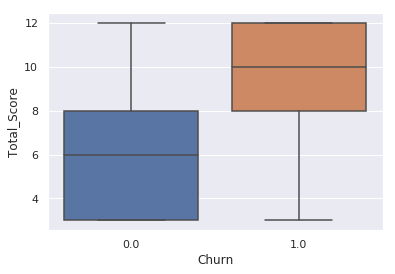

In [298]:
#avg_amount_transaction
sns.boxplot(y= churn_data["Total_Score"], x=churn_data["Churn"])

In [299]:
churn_data.shape

(4560, 29)

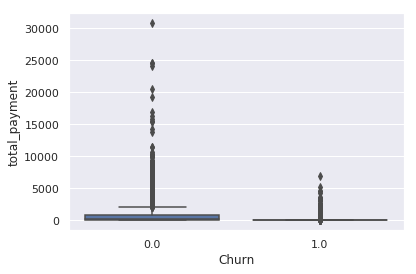

In [300]:
#total_payment
sns.boxplot(y= churn_data["total_payment"], x=churn_data["Churn"])

In [301]:
# total payment done by customer who has churned are very less compared to those who didn't churned

In [302]:
churn_data.drop('total_failed_payments', axis=1, inplace=True)

In [303]:
churn_data.head()

,AgentRefID,total_payment,max_amount_transaction,min_amount_transaction,avg_amount_transaction,median_amount_transaction,total_amount_transaction_gt100,total_count_transaction_gt100,total_amount_transaction_gt1000,total_count_transaction_gt1000,total_amount_transcation_debit,total_amount_transaction_credit,total_unique_payee,total_unique_distributer,avg_count_payment_permonth,avg_count_payment_gt100_permonth,avg_amount_payment_permonth,avg_amout_payment_gt100_permonth,avg_last_month_amount_txn,avg_txn_first_week,avg_last_month_1week_amount_txn,last_month_amount_gt100,vintage,total_ticket_raised,total_ticket_raised_last_2_month,avg_ticked_rasied_per_month,Churn,Total_Score
0,1,22,100.0,1.0,11.714286,2.0,0.0,0,0.0,0,238.0,8.0,8,1,4.0,2.000000,8.988889,100.000000,0.0,1.333333,0.0,0.0,156.0,0.0,0.0,0.000000,0.0,10
1,55,132,25000.0,1.0,7000.000000,4999.0,1074274.0,85,1069574.0,79,1074274.0,43.0,52,1,56.0,28.333333,7712.888651,11878.973459,0.0,5923.153846,0.0,0.0,56.0,0.0,0.0,0.000000,1.0,7
2,83,3361,25000.0,1.0,2254.882877,1950.0,7333954.0,2320,6879216.0,1797,7334204.0,930.0,1573,1,133.5,387.000000,1848.848726,2784.038428,16004.0,2140.512927,0.0,16000.0,203.0,1.0,0.0,1.000000,0.0,3
3,180,1965,25000.0,1.0,3157.239617,2000.0,5929067.0,1847,5508229.0,1372,5929274.0,22.0,883,1,297.0,264.142857,2917.410086,2946.772422,33000.0,3118.101190,23500.0,33000.0,202.0,7.0,0.0,2.333333,0.0,4
4,29,901,25000.0,1.0,2243.319098,2000.0,1890853.0,677,1799222.0,551,1890954.0,164.0,446,1,133.0,96.857143,2235.055844,2754.329794,178070.0,2148.735000,68861.0,178058.0,203.0,2.0,0.0,1.000000,0.0,3


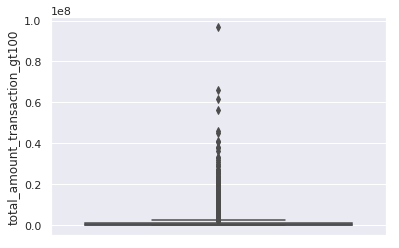

In [304]:
#total_amount_transaction_gt100
sns.boxplot(y= churn_data["total_amount_transaction_gt100"])

In [305]:
churn_data["total_amount_transaction_gt100"]= churn_data["total_amount_transaction_gt100"].clip(churn_data["total_amount_transaction_gt100"].min(),900000 )

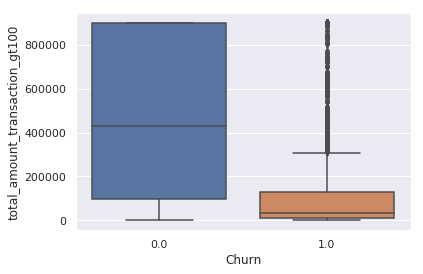

In [306]:
#total_amount_transaction_gt100
sns.boxplot(y= churn_data["total_amount_transaction_gt100"], x= churn_data['Churn'])

In [307]:
#Chustomer those who churn has very less transansaction are done more than Rs. 100 

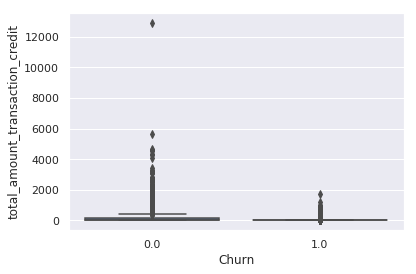

In [308]:
#total_amount_transaction_gt100
sns.boxplot(y= churn_data["total_amount_transaction_credit"], x= churn_data['Churn'])

In [309]:
#oulier clipping
churn_data['total_amount_transaction_credit'] = churn_data['total_amount_transaction_credit'].clip(churn_data['total_amount_transaction_credit'].min(), 3000)

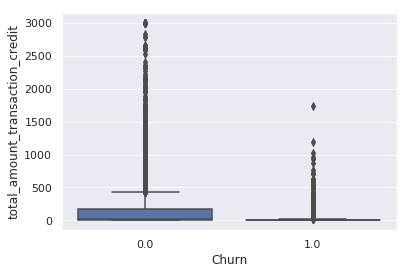

In [310]:
#total_amount_transaction_gt100
sns.boxplot(y= churn_data["total_amount_transaction_credit"], x= churn_data['Churn'])

In [311]:
churn_data.head()

,AgentRefID,total_payment,max_amount_transaction,min_amount_transaction,avg_amount_transaction,median_amount_transaction,total_amount_transaction_gt100,total_count_transaction_gt100,total_amount_transaction_gt1000,total_count_transaction_gt1000,total_amount_transcation_debit,total_amount_transaction_credit,total_unique_payee,total_unique_distributer,avg_count_payment_permonth,avg_count_payment_gt100_permonth,avg_amount_payment_permonth,avg_amout_payment_gt100_permonth,avg_last_month_amount_txn,avg_txn_first_week,avg_last_month_1week_amount_txn,last_month_amount_gt100,vintage,total_ticket_raised,total_ticket_raised_last_2_month,avg_ticked_rasied_per_month,Churn,Total_Score
0,1,22,100.0,1.0,11.714286,2.0,0.0,0,0.0,0,238.0,8.0,8,1,4.0,2.000000,8.988889,100.000000,0.0,1.333333,0.0,0.0,156.0,0.0,0.0,0.000000,0.0,10
1,55,132,25000.0,1.0,7000.000000,4999.0,900000.0,85,1069574.0,79,1074274.0,43.0,52,1,56.0,28.333333,7712.888651,11878.973459,0.0,5923.153846,0.0,0.0,56.0,0.0,0.0,0.000000,1.0,7
2,83,3361,25000.0,1.0,2254.882877,1950.0,900000.0,2320,6879216.0,1797,7334204.0,930.0,1573,1,133.5,387.000000,1848.848726,2784.038428,16004.0,2140.512927,0.0,16000.0,203.0,1.0,0.0,1.000000,0.0,3
3,180,1965,25000.0,1.0,3157.239617,2000.0,900000.0,1847,5508229.0,1372,5929274.0,22.0,883,1,297.0,264.142857,2917.410086,2946.772422,33000.0,3118.101190,23500.0,33000.0,202.0,7.0,0.0,2.333333,0.0,4
4,29,901,25000.0,1.0,2243.319098,2000.0,900000.0,677,1799222.0,551,1890954.0,164.0,446,1,133.0,96.857143,2235.055844,2754.329794,178070.0,2148.735000,68861.0,178058.0,203.0,2.0,0.0,1.000000,0.0,3


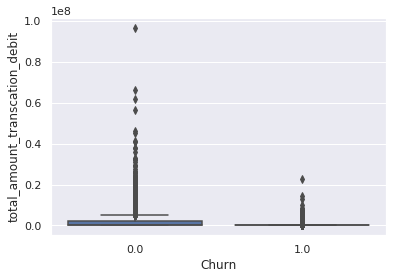

In [312]:
#total_amount_transaction_debit
sns.boxplot(y= churn_data["total_amount_transcation_debit"], x= churn_data['Churn'])

In [314]:
#oulier clipping
churn_data['total_amount_transcation_debit'] = churn_data['total_amount_transcation_debit'].clip(churn_data['total_amount_transcation_debit'].min(), 800000)

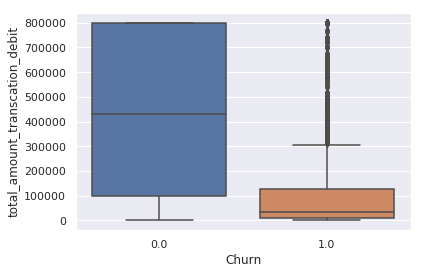

In [315]:
#total_amount_transaction_debit
sns.boxplot(y= churn_data["total_amount_transcation_debit"], x= churn_data['Churn'])

In [ ]:
# churn customer has used very less amount for debit compared to non churn customer

In [317]:
#remove high correlated independant features

In [323]:
columns_to_delete = set()
for col in churn_data.columns:
    for col2 in churn_data.columns:        
        if col != "Churn" and col2 != "Churn" and col != 'AgentRefID' and col != 'AgentRefID' and col != col2:
            corr_score = churn_data[col].corr(churn_data[col2], method="spearman")
            if abs(corr_score) >=0.8:
                if churn_data[col].corr(churn_data.Churn, method="spearman") > churn_data[col2].corr(churn_data.Churn, method="spearman"):
                    columns_to_delete.add(col2)
                else:
                    columns_to_delete.add(col)

In [324]:
churn_data = churn_data.drop(columns_to_delete, axis=1)

In [330]:
# filter features which has more than 5% correlation churn prediction
corr_dict = dict()
for col in churn_data.columns:
    if col != "Churn" and col!= "AgentRefID":
        corr_score = churn_data[col].corr(churn_data.Churn, method="spearman")
        if abs(corr_score) >=0.005:
            corr_dict[col] = corr_score
sorted_dict = {k: v for k, v in sorted(corr_dict.items(), key=lambda item:item[1])}
sorted_dict

{'avg_last_month_1week_amount_txn': -0.5724433345778658,
 'vintage': -0.5341442039764839,
 'total_amount_transaction_credit': -0.35921308161668414,
 'max_amount_transaction': -0.29753497016698255,
 'avg_txn_first_week': -0.2645448972065566,
 'total_unique_distributer': -0.09942332210398672,
 'total_ticket_raised_last_2_month': -0.09060521477781103,
 'median_amount_transaction': -0.08143250806772119,
 'avg_amount_transaction': -0.07866438325527357,
 'avg_ticked_rasied_per_month': -0.04583630196655239,
 'avg_amout_payment_gt100_permonth': -0.03646475234757551,
 'min_amount_transaction': 0.18784797858232571,
 'Total_Score': 0.5928007378823636}

In [331]:
col_from_EDA = list(sorted_dict.keys())

In [332]:
col_from_EDA.append("AgentRefID")
col_from_EDA.append("Churn")

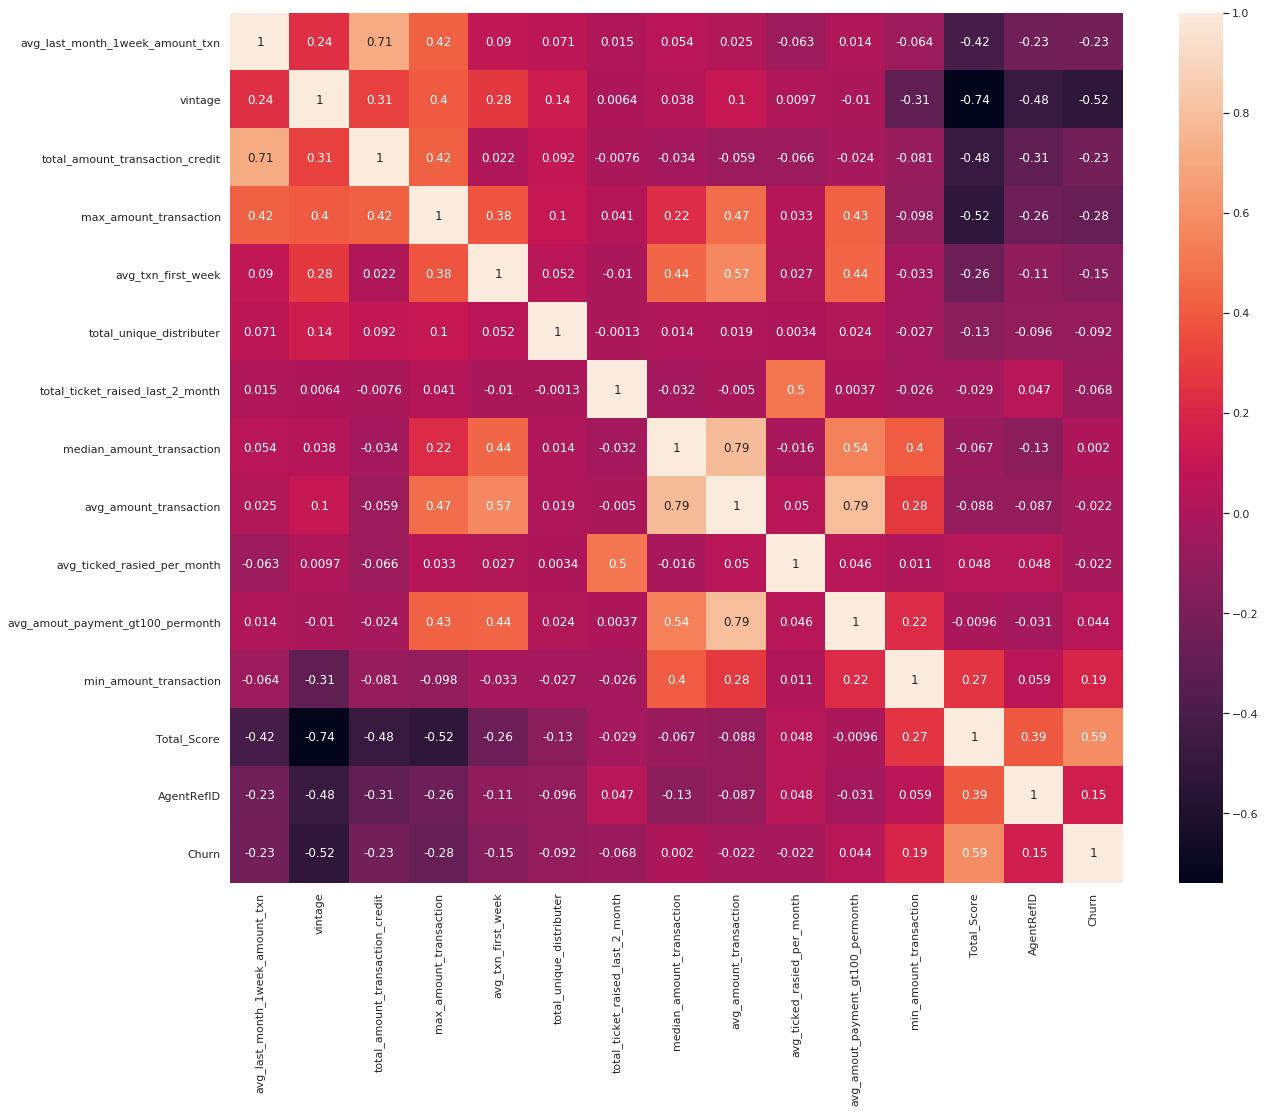

In [333]:
#plotting correlation between features
plt.figure(figsize=(20,16))
sns.heatmap(churn_data[col_from_EDA].corr(), annot=True)

In [336]:
#churn_data to csv for modelling
churn_data.to_csv("churn_data_modelling.csv", index= False)